In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
data = pd.read_csv('/content/water_potability.csv')

In [83]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [84]:
data.shape

(3276, 10)

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [86]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [87]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [88]:
data = data.dropna()

In [89]:
data.shape

(2011, 10)

<Axes: xlabel='Potability', ylabel='count'>

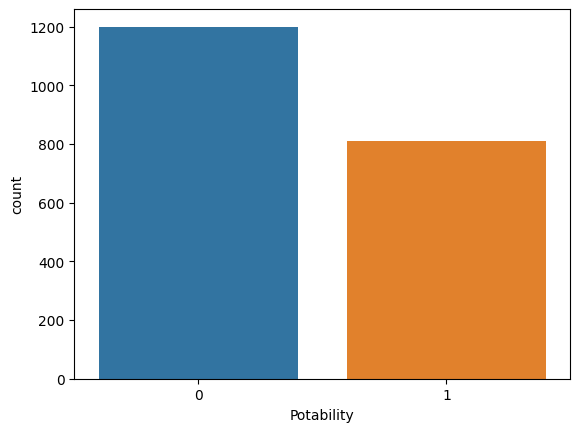

In [90]:
sns.countplot(x='Potability', data=data)

In [91]:
zero  = data[data['Potability']==0]   #zero values in Potability column
one = data[data['Potability']==1]  # one values in Potability column
from sklearn.utils import resample
#minority class that  is 1, we need to upsample/increase that class so that there is no bias
#n_samples = 1998 means we want 1998 sample of class 1, since there are 1998 samples of class 0
data_minority_upsampled = resample(one, replace = True, n_samples = 1200)
#concatenate
data = pd.concat([zero, data_minority_upsampled])

from sklearn.utils import shuffle
data = shuffle(data) # shuffling so that there is particular sequence
data['Potability'].value_counts()


0    1200
1    1200
Name: Potability, dtype: int64

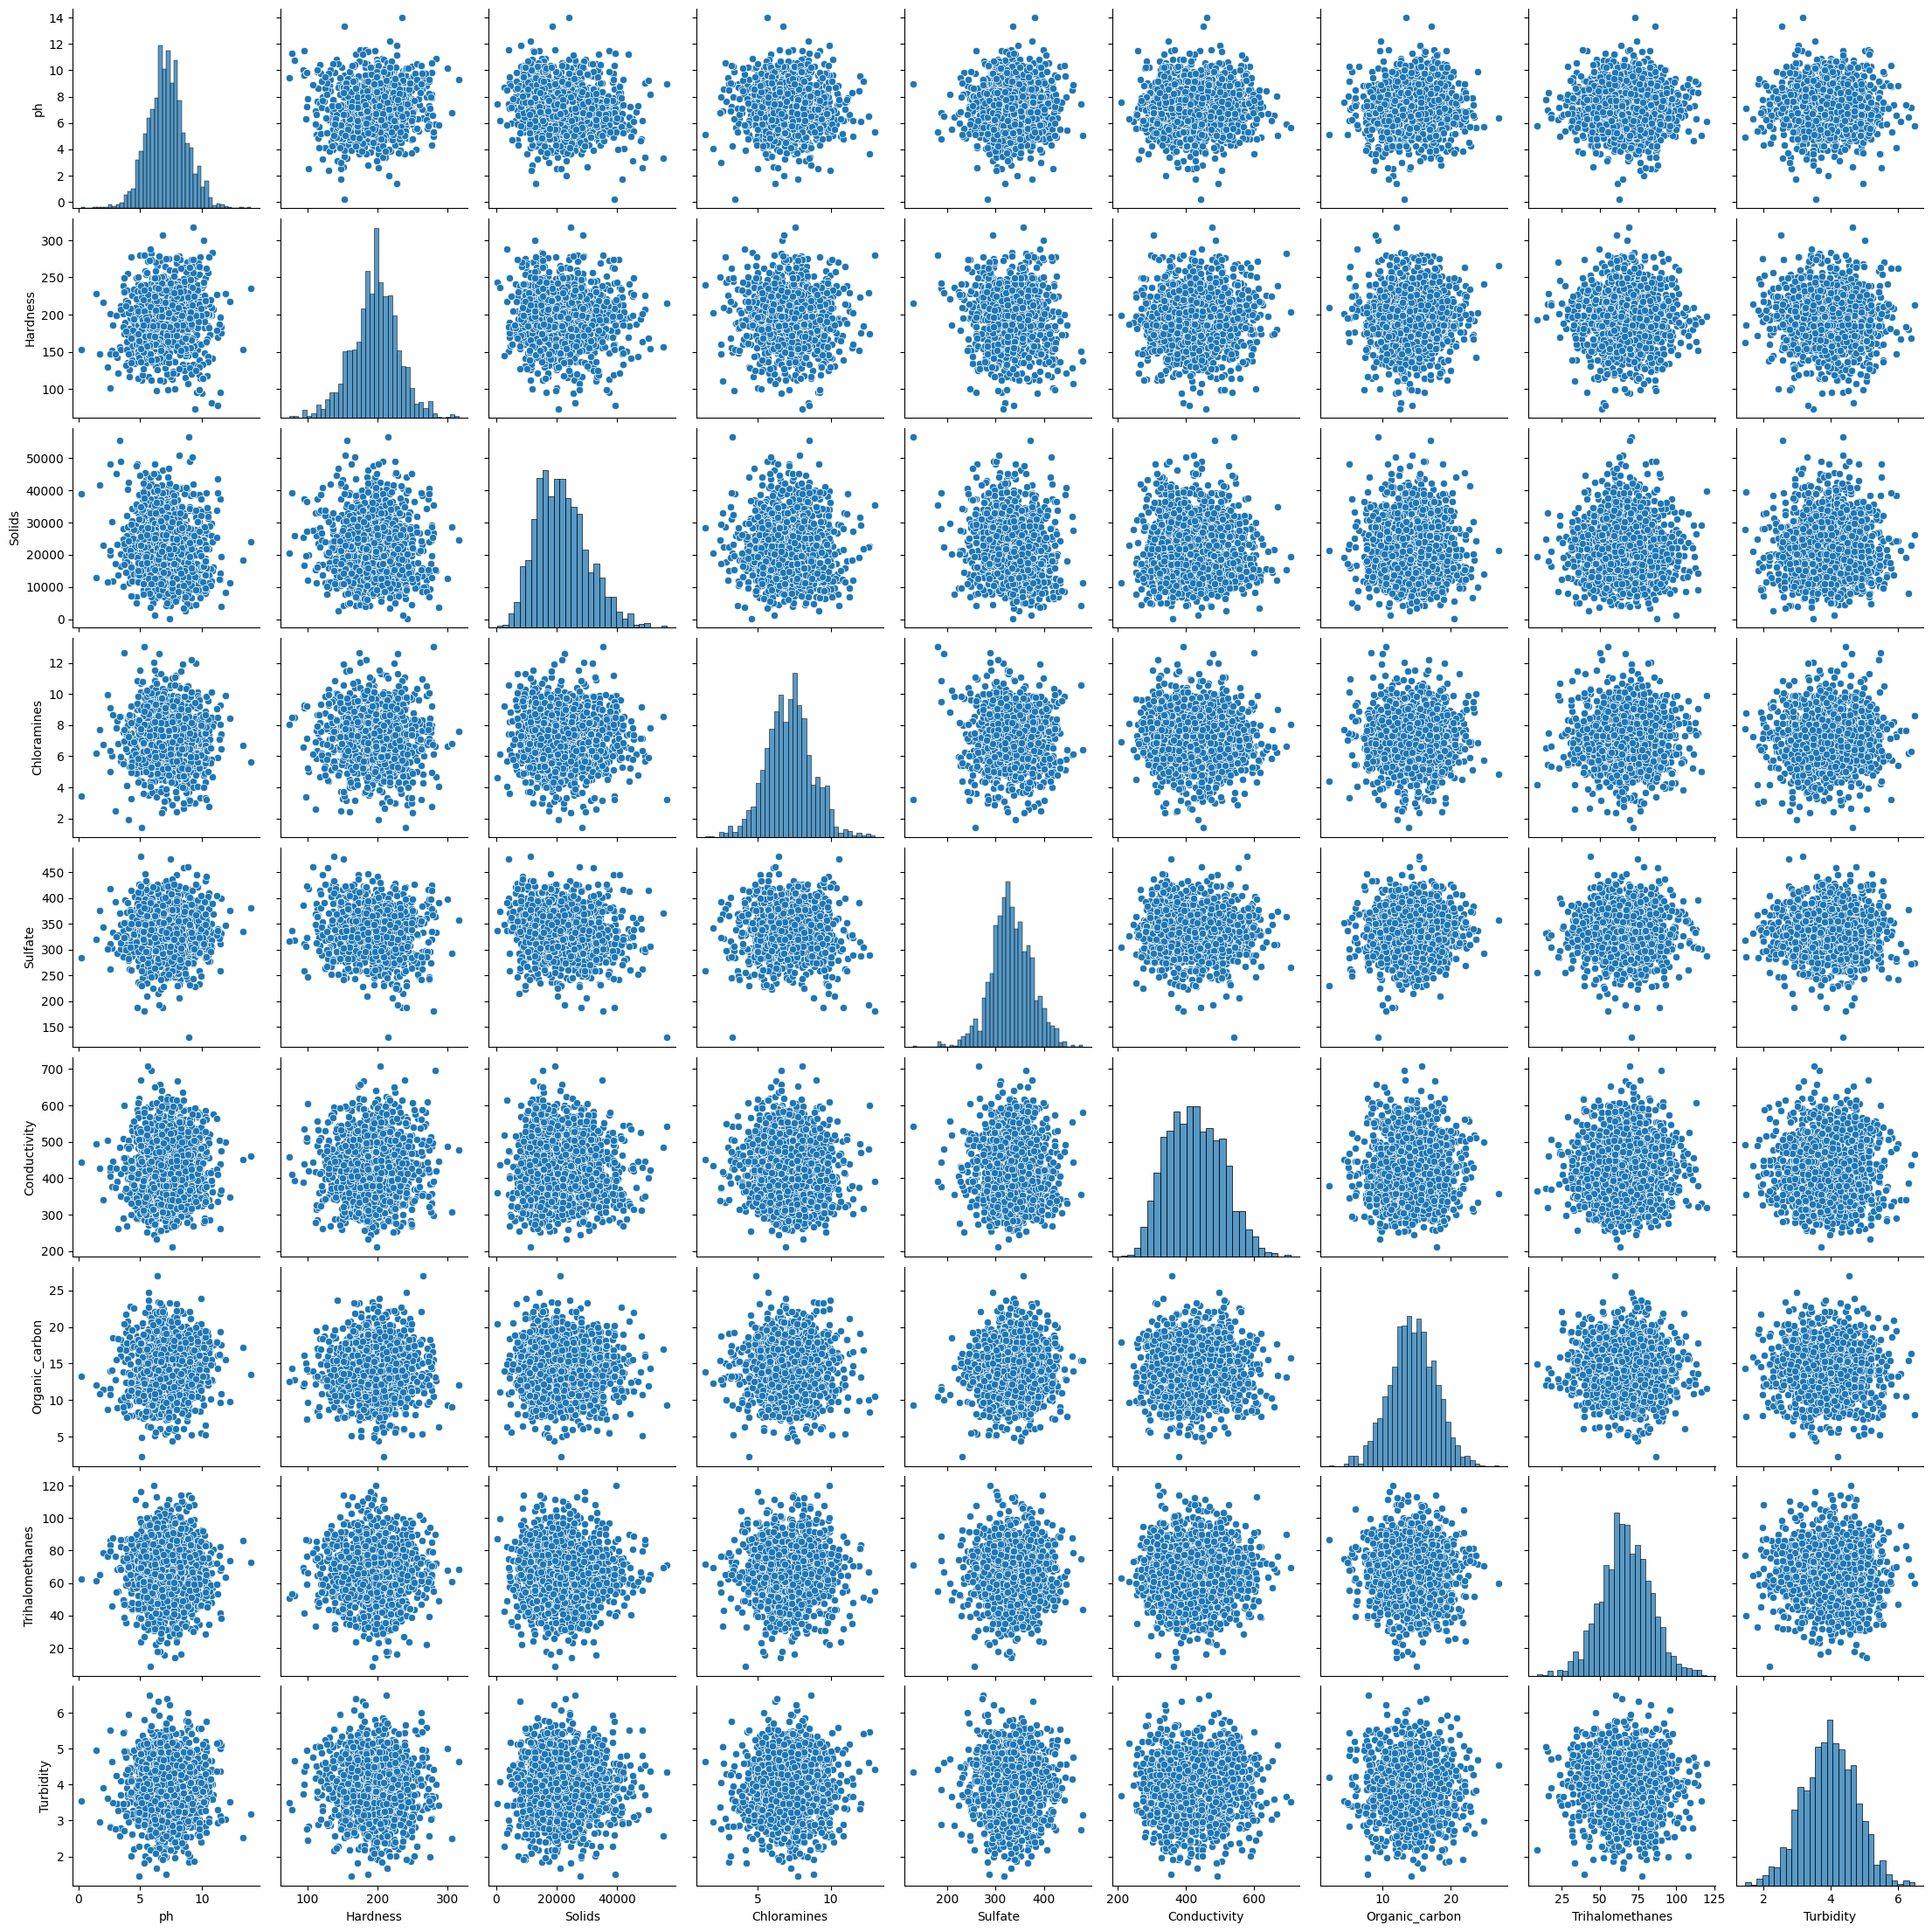

In [92]:
#plt.figure(figsize=(10,10))
sns.pairplot(train_data.iloc[:,:-1], kind='scatter')
plt.show()

<Axes: >

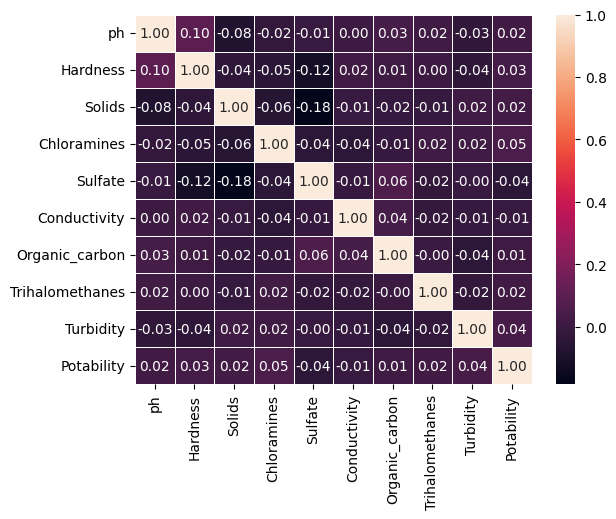

In [93]:
sns.heatmap(train_data.corr(), annot=True, fmt='.2f', linewidths=.5)

<ipython-input-94-8bb3f99148c6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['ph'], bins=30, kde=True, color='blue')


<Axes: xlabel='ph', ylabel='Density'>

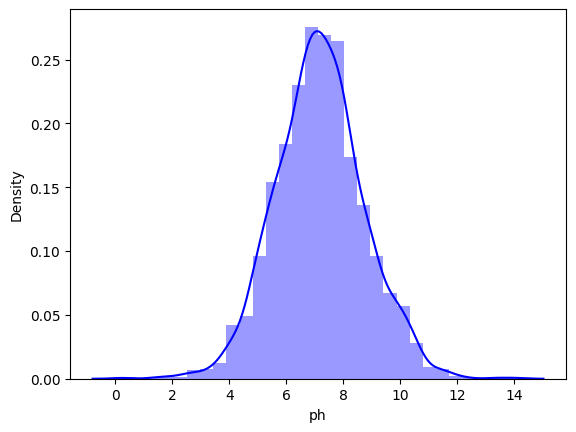

In [94]:
sns.distplot(train_data['ph'], bins=30, kde=True, color='blue')

<ipython-input-95-cf8ea97ff71b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Sulfate'], bins=30, kde=True, color='blue')


<Axes: xlabel='Sulfate', ylabel='Density'>

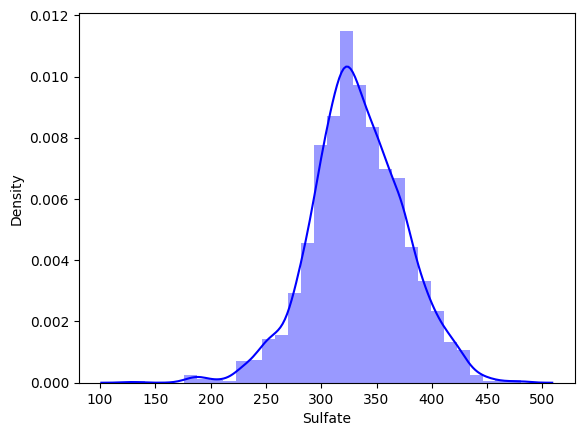

In [95]:
sns.distplot(train_data['Sulfate'], bins=30, kde=True, color='blue')

<ipython-input-96-ba6b8b466803>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Trihalomethanes'], bins=30, kde=True, color='blue')


<Axes: xlabel='Trihalomethanes', ylabel='Density'>

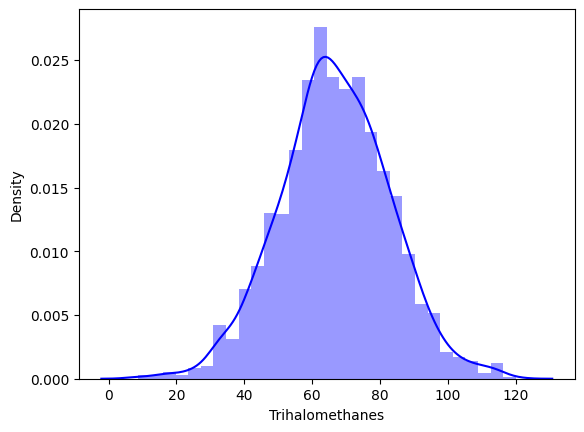

In [96]:
sns.distplot(train_data['Trihalomethanes'], bins=30, kde=True, color='blue')

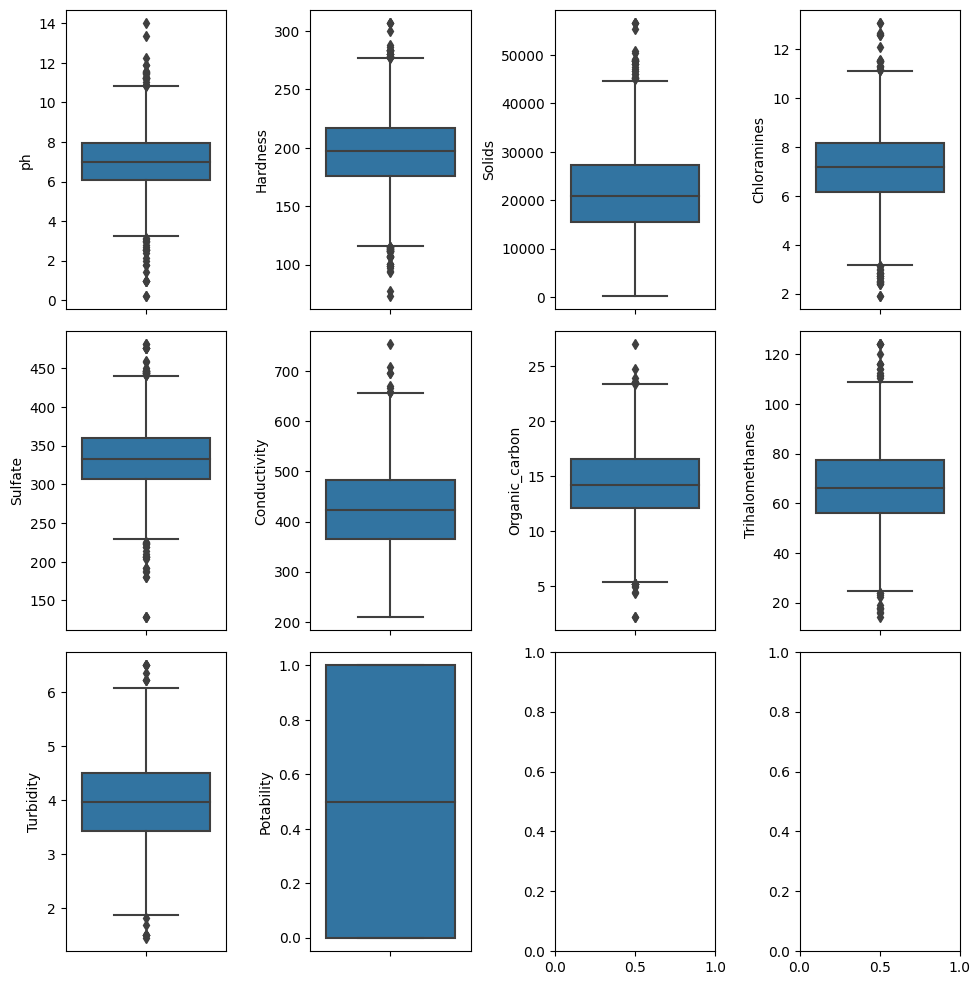

In [97]:
# box plot
fig, ax = plt.subplots(figsize=(10,10), nrows=3, ncols=4)
ax = ax.flatten()

i=0
for k,v in data.items():
  sns.boxplot(y=v, ax=ax[i])
  i+=1
  if i==12:
    break
plt.tight_layout(pad=1.25, h_pad=0.8, w_pad=0.8)


In [98]:
X = data.drop(['Potability'], axis = 1)
y = data['Potability']

In [99]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features= X.columns
X[features] = sc.fit_transform(X[features])

In [100]:
from sklearn.model_selection import train_test_split
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y ,random_state=104, test_size=0.2, shuffle=True)
train_data = pd.concat([X_train,y_train], axis=1)
test_data = pd.concat([X_test,y_test],axis=1)
train_data.head()
test_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2339,7.352146,208.324476,13714.832635,8.219240,352.849847,336.912934,20.846445,69.437225,5.864498,1
1564,5.632732,283.997284,28315.437777,7.144655,318.465146,425.984213,11.813231,67.651025,5.114607,1
1459,6.867001,184.248496,14464.115547,6.759352,371.283819,497.703775,14.782861,73.433479,3.484121,0
913,8.238879,198.213405,11451.312217,5.308990,309.329423,401.063764,13.243329,81.197710,2.784713,0
1534,7.490787,202.458061,26551.370105,7.120772,312.934025,306.345563,17.998160,67.356079,4.354535,1


**Logistic_regression**

In [101]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)

In [102]:
X_train = train_data.iloc[:,:-1]
y_train = train_data.iloc[:,-1]
X_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]

In [103]:
log_reg.fit(X_train,y_train)
y_pred_log = log_reg.predict(X_test)

In [104]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [105]:
log_reg_accuracy = accuracy_score(y_pred_log, y_test) * 100
print('Accuracy Score for logistic regression is %f'%log_reg_accuracy)

Accuracy Score for logistic regression is 51.250000


In [106]:
log_train_score = log_reg.score(X_train,y_train)*100
print('Train score for Logistic Regression is %f'%log_train_score)

Train score for Logistic Regression is 51.927083


In [107]:
confusion_matrix(y_pred_log,y_test)

array([[137, 133],
       [101, 109]])

In [108]:
print(classification_report(y_pred_log, y_test))

              precision    recall  f1-score   support

           0       0.58      0.51      0.54       270
           1       0.45      0.52      0.48       210

    accuracy                           0.51       480
   macro avg       0.51      0.51      0.51       480
weighted avg       0.52      0.51      0.51       480



**Random_Forest**

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
rf_clf = RandomForestClassifier(n_estimators = 150,min_samples_split=10,random_state=0)

In [111]:
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

In [112]:
rf_accuracy = accuracy_score(y_pred_rf, y_test)*100
print('Accuracy score for Random Forest is %f'%rf_accuracy)

Accuracy score for Random Forest is 85.208333


In [113]:
rf_train_score = rf_clf.score(X_train, y_train)*100
print('Train score for Random Forest is %f'%rf_train_score)

Train score for Random Forest is 99.531250


In [114]:
confusion_matrix(y_pred_rf, y_test)

array([[199,  32],
       [ 39, 210]])

In [115]:
print(classification_report(y_pred_rf, y_test))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       231
           1       0.87      0.84      0.86       249

    accuracy                           0.85       480
   macro avg       0.85      0.85      0.85       480
weighted avg       0.85      0.85      0.85       480



**Hyperparameter_Tuning**

In [116]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter space
params_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
random_search = GridSearchCV(rf_clf, param_grid=params_rf, cv=5)

# Fit the RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate the model on the test set
accuracy = random_search.score(X_test, y_test)
print(f"Accuracy on Test Set: {accuracy:.4f}")


Best Hyperparameters: {'min_samples_leaf': 2, 'n_estimators': 350}
Accuracy on Test Set: 0.8479


**XgBOOST**

In [117]:
import xgboost as xgb

In [118]:
model = xgb.XGBClassifier(objective="multi:softmax", num_class=len(set(y)), random_state=42)

In [119]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [120]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8395833333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       238
           1       0.82      0.87      0.85       242

    accuracy                           0.84       480
   macro avg       0.84      0.84      0.84       480
weighted avg       0.84      0.84      0.84       480



XgBOOST performed best with accuracy of 83.95%